<a href='https://colab.research.google.com/github/fernandovieira1/FinScore/blob/main/FINSCORE.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

In [ ]:
#v7

**# INTRUÇÕES**

* Antes de iniciar, certifique-se de estar logado na sua conta Google.

* Um botão azul 'Fazer login', localizado no canto superior direito da tela, aparecerá, se não.

* Feito isto, basta inserir os dados nas seções abaixo descritas:
    - 1.1 Cliente
    - 1.2 Período
    - 1.3 Score Serasa
    - 1.4 Lançamento dos dados Contábeis (na planilha indicada no link)

* Cada uma das seções mencionadas possui anotações sobre como proceder.

* Logo após, clique no menu 'Ambiente de execução' e em 'Executar tudo' (ou CTR + F9), nesta ordem.

##### 1. LANÇAMENTO DOS DADOS #####

##### 1.1 Cliente

*--> Insira o nome do cliente/empresa*

In [1]:
# Cliente
cliente = 'FinScore_Assertif_Empresas FEV-2025.xlsx'

##### 1.2 Período

*--> Insira os anos inicial (a primeira) e final (da última) das demonstrações contábeis que serviram de base para a análise*

In [2]:
# Ano Inicial
ano_inicial = 2021

In [3]:
# Ano Final
ano_final = 2023

##### 1.3 Score Serasa

*--> Insira o score Serasa do cliente*

In [4]:
# Serasa
serasa = 389

##### 1.4 Lançamento dos dados Contábeis

*--> Acesse a planilha abaixo (CTRL + click) e insira as informações nas linhas e colunas respectivas*

In [5]:
# Lance do ano mais recente para o mais antigo
'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

*--> Agora basta clicar no menu 'Ambiente de execução' e em 'Executar tudo' (ou CTR + F9), nesta ordem.*

##### CONFIGURAÇÃO DO AMBIENTE

##### Configuração do ambiente

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import subprocess
import importlib.util


In [7]:
%%capture
# Lista de pacotes necessários
required_packages = ['gspread', 'pandas', 'gspread_dataframe', 'openpyxl']

# Verificar e instalar pacotes que não estão instalados
def install_missing_packages(packages):
    for package in packages:
        if importlib.util.find_spec(package) is None:
            print(f'⚠ Instalando {package}...')
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', package])
        else:
            print(f'✔ {package} já está instalado')

install_missing_packages(required_packages)

In [8]:
# Definir o ID da planilha e da aba (worksheet)
sheet_id = '1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33'
gid = '1575975872'  # ID da aba específica

# Construir a URL para baixar a planilha como um arquivo Excel (.xlsx)
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx&id={sheet_id}&gid={gid}'

# Ler a planilha diretamente no Pandas
df_dados_contabeis = pd.read_excel(url, engine='openpyxl')

In [9]:
# Função para calcular os índices contábeis
def calcular_indices_contabeis(df):
    indices = {}

    indices['Liquidez Corrente'] = df['Ativo Circulante'] / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Passivo Circulante: BP
    # => A liquidez corrente mede a capacidade da empresa de pagar suas obrigações de curto prazo.

    indices['Liquidez Seca'] = (df['Ativo Circulante'] - df['Estoques']) / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Estoque: BP
    # Passivo Circulante: BP
    # => A liquidez seca é uma medida de liquidez que desconsidera o estoque da empresa.

    indices['Margem Líquida'] = df['Lucro Líquido'] / df['Receita Total']
    # Lucro Líquido: DRE
    # Receita Total: DRE
    # => A margem líquida mede a porcentagem de lucro líquido que a empresa gera para cada real de receita.

    indices['ROA'] = df['Lucro Líquido'] / df['Ativo Total']
    # Lucro Líquido: DRE
    # Ativo Total: BP
    # => O retorno sobre ativos (ROA) mede a eficiência da empresa em gerar lucro a partir de seus ativos.

    indices['ROE'] = df['Lucro Líquido'] / df['Patrimônio Líquido']
    # Lucro Líquido: DRE
    # Patrimônio Líquido: BP
    # => O retorno sobre o patrimônio líquido (ROE) mede a eficiência da empresa em gerar lucro a partir de seu patrimônio líquido.

    indices['Endividamento'] = df['Passivo Total'] / df['Ativo Total']
    # Passivo Total: BP
    # Ativo Total: BP
    # => O endividamento mede a proporção de dívidas da empresa em relação ao total de ativos.

    indices['Cobertura de Juros'] = df['EBIT'] / df['Despesa de Juros']
    # EBIT: DRE (Lucro antes de juros e impostos)
    # Despesa de Juros: DRE
    # => A cobertura de juros mede a capacidade da empresa de pagar seus juros com seu lucro antes de juros e impostos.
    # => Reflete a capacidade de gerar resultados com suas atividades principais

    indices['Giro do Ativo'] = df['Receita Total'] / df['Ativo Total']
    # Ativo Total: BP
    # Receita Total: DRE
    # => O giro do ativo mede a eficiência da empresa em gerar receita a partir de seus ativos.

    indices['Período Médio de Recebimento'] = df['Contas a Receber'] / df['Receita Total'] * 365
    # Contas a Receber: BP
    # Receita Total: DRE
    # => O período médio de recebimento mede o tempo médio que a empresa leva para receber suas vendas.

    indices['Período Médio de Pagamento'] = df['Contas a Pagar'] / df['Custos'] * 365
    # Contas a Pagar: BP
    # Custos: DRE
    # => O período médio de pagamento mede o tempo médio que a empresa leva para pagar seus custos.

    return pd.DataFrame(indices)



##### Importação dos Dados Contábeis

In [10]:
## Importar os dados
# - Do mais recente para o mais antigo

# arquivo_dados_contabeis = '/content/dados_contabeis_global.xlsx'
arquivo_dados_contabeis = df_dados_contabeis

In [11]:
arquivo_dados_contabeis

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,0,97369173.64,60252830.01,62152223.21,8393965.79,1.048415e+08,1.017093e+08,41270424.62,60438884.67,12230341.96,3836376.17,29961276.83,15994921.21,96017991.50
1,1,76433172.07,44514525.38,52149084.57,9384502.93,9.877322e+07,7.992169e+07,35263817.92,44657868.91,10638475.31,1253972.38,20458540.88,8604560.65,87908310.69
2,2,58355615.56,33474062.26,38002758.30,16381789.91,9.396682e+07,6.247259e+07,29023034.37,33449556.81,12230341.96,983943.59,17562561.88,6470322.21,77619824.12


##### Leitura dos Dados Contábeis

In [12]:
df_dados_contabeis = arquivo_dados_contabeis
print('Dados Contabeis Importados:')
print(df_dados_contabeis)

Dados Contabeis Importados:
   Ano  Ativo Circulante  Passivo Circulante     Estoques  Lucro Líquido  \
0    0       97369173.64         60252830.01  62152223.21     8393965.79   
1    1       76433172.07         44514525.38  52149084.57     9384502.93   
2    2       58355615.56         33474062.26  38002758.30    16381789.91   

   Receita Total   Ativo Total  Patrimônio Líquido  Passivo Total  \
0   1.048415e+08  1.017093e+08         41270424.62    60438884.67   
1   9.877322e+07  7.992169e+07         35263817.92    44657868.91   
2   9.396682e+07  6.247259e+07         29023034.37    33449556.81   

          EBIT  Despesa de Juros  Contas a Receber  Contas a Pagar  \
0  12230341.96        3836376.17       29961276.83     15994921.21   
1  10638475.31        1253972.38       20458540.88      8604560.65   
2  12230341.96         983943.59       17562561.88      6470322.21   

        Custos  
0  96017991.50  
1  87908310.69  
2  77619824.12  


##### 2. PROCESSAMENTO DO MODELO #####

##### 2.1 Índices contábeis

In [13]:
df_indices = calcular_indices_contabeis(df_dados_contabeis).round(2)
print('\nÍndices Contábeis Calculados:')


Índices Contábeis Calculados:


In [14]:
if (df_dados_contabeis['Estoques'] == 0).all():
        del df_indices['Liquidez Seca']

In [15]:
print(df_indices)

   Liquidez Corrente  Liquidez Seca  Margem Líquida   ROA   ROE  \
0               1.62           0.58            0.08  0.08  0.20   
1               1.72           0.55            0.10  0.12  0.27   
2               1.74           0.61            0.17  0.26  0.56   

   Endividamento  Cobertura de Juros  Giro do Ativo  \
0           0.59                3.19           1.03   
1           0.56                8.48           1.24   
2           0.54               12.43           1.50   

   Período Médio de Recebimento  Período Médio de Pagamento  
0                        104.31                       60.80  
1                         75.60                       35.73  
2                         68.22                       30.43  


##### 2.2 Padronização dos índices contábeis

In [16]:
# Escalar os índices contábeis para o PCA
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(df_indices)
print('\nÍndices Escalados para PCA:')
print(indices_scaled)


Índices Escalados para PCA:
[[-1.3970014   0.         -0.95025527 -0.95025527 -0.91969405  1.29777137
  -1.27947272 -1.17909226  1.38747641  1.39521628]
 [ 0.50800051 -1.22474487 -0.43193421 -0.43193421 -0.47054114 -0.16222142
   0.1179968  -0.08669796 -0.45671099 -0.49753654]
 [ 0.88900089  1.22474487  1.38218948  1.38218948  1.39023519 -1.13554995
   1.16147592  1.26579023 -0.93076543 -0.89767974]]


##### 2.3 Cálculo do PCA

In [17]:
# Realizar o PCA
pca = PCA()
pca_result = pca.fit_transform(indices_scaled)
print('\nComponentes Principais (PCA):')
print(pca_result)

#relatório



Componentes Principais (PCA):
[[-3.52110015e+00  8.87982410e-01  5.33777076e-16]
 [-1.28733403e-01 -1.68520581e+00  5.33777076e-16]
 [ 3.64983355e+00  7.97223401e-01  5.33777076e-16]]


##### 2.4 Variância Explicada PCA

In [18]:
# Variância explicada pelos componentes principais
explained_variance_ratio = pca.explained_variance_ratio_
print('\nVariância Explicada por Componente:')
print(explained_variance_ratio)

#relatório


Variância Explicada por Componente:
[8.57866782e-01 1.42133218e-01 2.84917967e-32]


##### 2.5 DataFrame PCA

In [19]:
# DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print('\nMatriz de Componentes Principais:')
print(pca_df)

#relatório


Matriz de Componentes Principais:
        PC1       PC2           PC3
0 -3.521100  0.887982  5.337771e-16
1 -0.128733 -1.685206  5.337771e-16
2  3.649834  0.797223  5.337771e-16


##### 2.6 Matriz de cargas

In [20]:
# Obter a matriz de cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=df_indices.columns,
    index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

print('Matriz de Cargas dos Componentes Principais:')
print(loadings)

# Identificar os índices mais significativos para cada PC
print('\nÍndices mais significativos por componente:')
for pc in loadings.index:
    print(f'\n{pc}:')
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(3))  # Top 3 índices mais significativos

#relatório

Matriz de Cargas dos Componentes Principais:
     Liquidez Corrente  Liquidez Seca  Margem Líquida       ROA       ROE  \
PC1           0.314668       0.179817        0.328190  0.328190  0.325343   
PC2          -0.325485       0.713026        0.231239  0.231239  0.254366   
PC3           0.867087       0.136543        0.001938  0.001938 -0.001736   

     Endividamento  Cobertura de Juros  Giro do Ativo  \
PC1      -0.337786            0.339181       0.341265   
PC2       0.122066           -0.095929       0.025377   
PC3       0.026752           -0.138455      -0.194202   

     Período Médio de Recebimento  Período Médio de Pagamento  
PC1                     -0.319544                   -0.315707  
PC2                      0.295422                    0.319355  
PC3                      0.182383                    0.372348  

Índices mais significativos por componente:

PC1:
Giro do Ativo         0.341265
Cobertura de Juros    0.339181
Endividamento         0.337786
Name: PC1, dtype:

##### 2.7 Escore final

In [21]:
pca_df.dot(explained_variance_ratio)

0   -2.894423
1   -0.349960
2    3.244383
dtype: float64

##### 3. RESULTADOS #####

##### 3.1A FINSCORE BRUTO

In [22]:
# Função para categorizar escores consolidados com mais granularidade
def categorias_finscore_bruto(escores):
    categorias = []
    for escore in escores:
        if finscore_bruto > 1.5:
            categorias.append('Muito Abaixo do Risco')
        elif 1.0 < escore <= 1.5:
            categorias.append('Levemente Abaixo do Risco')
        elif -1.0 <= escore <= 1.0:
            categorias.append('Neutro')
        elif -1.5 < escore < -1.0:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore   |      Categoria            |
# -------------------------------------------------------
# |  escore > 1.5           | Muito Abaixo do Risco     |
# |  1.0 < escore ≤ 1.5     | Levemente Abaixo do Risco |
# | -1.0 ≤ escore ≤ 1.0     | Neutro                    |
# | -1.5 < escore < -1.0    | Levemente Acima do Risco  |
# |  escore ≤ -1.5          | Muito Acima do Risco      |
# -------------------------------------------------------

In [23]:
# Calcular o escore consolidado com penalização do último ano
# Do mais recente para o mais antigo: 0.5, 0.3, 0.2
pesos = [0.6, 0.25, 0.15]  # Pesos para os três anos
finscore_bruto = round((pca_df.dot(explained_variance_ratio) * pesos).sum(), 2)
print('\nFINSCORE BRUTO:')
print(finscore_bruto)
print('\nCLASSIFICAÇÃO FINSCORE BRUTO:')
print(categorias_finscore_bruto([finscore_bruto])[0])



FINSCORE BRUTO:
-1.34

CLASSIFICAÇÃO FINSCORE BRUTO:
Levemente Acima do Risco


##### 3.1B FINSCORE AJUSTADO

In [24]:
# Função para categorizar escores consolidados com mais granularidade
def categorias_finscore_ajustado(escores):
    categorias = []
    for escore in escores:
        if escore > 750:
            categorias.append('Muito Abaixo do Risco')
        elif 500 < escore <= 750:
            categorias.append('Levemente Abaixo do Risco')
        elif 250 <= escore <= 500:
            categorias.append('Neutro')
        elif 100 < escore < 250:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore  |      Categoria            |
# -------------------------------------------------------
# |  escore > 750          | Muito Abaixo do Risco     |
# |  500 < escore ≤ 750    | Levemente Abaixo do Risco |
# | 250 ≤ escore ≤ 500     | Neutro                    |
# | 100 < escore < 250     | Levemente Acima do Risco  |
# |  escore ≤ 250          | Muito Acima do Risco      |
# -------------------------------------------------------

In [25]:
# Traduz a tendência em um escore de risco ajustado ao ponto de referência atual do cliente.
escores_ajustados = round(min(((finscore_bruto + 2)/4)*1000, 1000), 2)

In [26]:
print('\nFINSCORE AJUSTADO:')
print(escores_ajustados)
print('\nCLASSIFICAÇÃO FINSCORE AJUSTADO:')
print(categorias_finscore_ajustado([escores_ajustados])[0])


FINSCORE AJUSTADO:
165.0

CLASSIFICAÇÃO FINSCORE AJUSTADO:
Levemente Acima do Risco


##### 3.1C FINSCORE

In [27]:
# Função para categorizar escores consolidados com mais granularidade
def categorias_finscore(escores):
    categorias = []
    for escore in escores:
        if escore > 750:
            categorias.append('Muito Abaixo do Risco')
        elif 500 < escore <= 750:
            categorias.append('Levemente Abaixo do Risco')
        elif 250 <= escore <= 500:
            categorias.append('Neutro')
        elif 100 < escore < 250:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore  |      Categoria            |
# -------------------------------------------------------
# |  escore > 750          | Muito Abaixo do Risco     |
# |  500 < escore ≤ 750    | Levemente Abaixo do Risco |
# | 250 ≤ escore ≤ 500     | Neutro                    |
# | 100 < escore < 250     | Levemente Acima do Risco  |
# |  escore ≤ 250          | Muito Acima do Risco      |
# -------------------------------------------------------

In [28]:
finscore = min(round(((serasa + escores_ajustados) / 2) + ((serasa * escores_ajustados)/1000), 2), 1000)


In [29]:
print('\nFINSCORE:')
print(finscore)
print('\nCLASSIFICAÇÃO FINSCORE:')
print(categorias_finscore([finscore])[0])



FINSCORE:
341.18

CLASSIFICAÇÃO FINSCORE:
Neutro


##### 3.2 SERASA

In [30]:
# Função para categorizar escores conforme a classificação do Serasa
def categorias_serasa(escores):
    categorias = []
    for escore in escores:
        if escore >= 701:
            categorias.append('Excelente')
        elif 501 <= escore <= 700:
            categorias.append('Bom')
        elif 301 <= escore <= 500:
            categorias.append('Baixa')
        else:
            categorias.append('Muito Baixa')
    return categorias

# Tabela de Categorias:
# ---------------------------------
# |   Intervalo do Escore  | Categoria  |
# ---------------------------------
# |  701 a 1.000          | Excelente  |
# |  501 a 700            | Bom        |
# |  301 a 500            | Baixo      |
# |  0 a 300              | Muito Baixo|
# ---------------------------------

In [31]:
print('\nSERASA:')
print(serasa)
print('\nCLASSIFICAÇÃO SERASA:')
print(categorias_serasa([serasa])[0])


SERASA:
389

CLASSIFICAÇÃO SERASA:
Baixa


##### 3.3 Valores e Contas Contábeis

In [32]:
df_dados_contabeis
# Sendo 0 o mais recente e 2 o mais antigo

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,0,97369173.64,60252830.01,62152223.21,8393965.79,1.048415e+08,1.017093e+08,41270424.62,60438884.67,12230341.96,3836376.17,29961276.83,15994921.21,96017991.50
1,1,76433172.07,44514525.38,52149084.57,9384502.93,9.877322e+07,7.992169e+07,35263817.92,44657868.91,10638475.31,1253972.38,20458540.88,8604560.65,87908310.69
2,2,58355615.56,33474062.26,38002758.30,16381789.91,9.396682e+07,6.247259e+07,29023034.37,33449556.81,12230341.96,983943.59,17562561.88,6470322.21,77619824.12


##### 3.4 Índices contábeis

In [33]:
print(df_indices)
# Sendo 0 o mais recente e 2 o mais antigo


   Liquidez Corrente  Liquidez Seca  Margem Líquida   ROA   ROE  \
0               1.62           0.58            0.08  0.08  0.20   
1               1.72           0.55            0.10  0.12  0.27   
2               1.74           0.61            0.17  0.26  0.56   

   Endividamento  Cobertura de Juros  Giro do Ativo  \
0           0.59                3.19           1.03   
1           0.56                8.48           1.24   
2           0.54               12.43           1.50   

   Período Médio de Recebimento  Período Médio de Pagamento  
0                        104.31                       60.80  
1                         75.60                       35.73  
2                         68.22                       30.43  


##### 4. APRESENTAÇÃO #####

##### 4.1 Criação dos dfs

In [34]:
 categorias_serasa([serasa])[0]

'Baixa'

In [35]:
# Df resultados principais
resultados_df = pd.DataFrame({
    'Métrica': ['Finscore Bruto', 'Finscore Ajustado', 'Finscore', 'Serasa'],
    'Valor': [finscore_bruto, escores_ajustados, finscore, serasa],
    'Cateegoria': [categorias_finscore_bruto([finscore_bruto])[0], 
                   categorias_finscore_ajustado([escores_ajustados])[0], 
                   categorias_finscore([finscore])[0],
                   categorias_serasa([serasa])[0]]
                   
})
resultados_df

,Métrica,Valor,Cateegoria
0,Finscore Bruto,-1.34,Levemente Acima do Risco
1,Finscore Ajustado,165.00,Levemente Acima do Risco
2,Finscore,341.18,Neutro
3,Serasa,389.00,Baixa


##### 4.2 Tabela Resumo

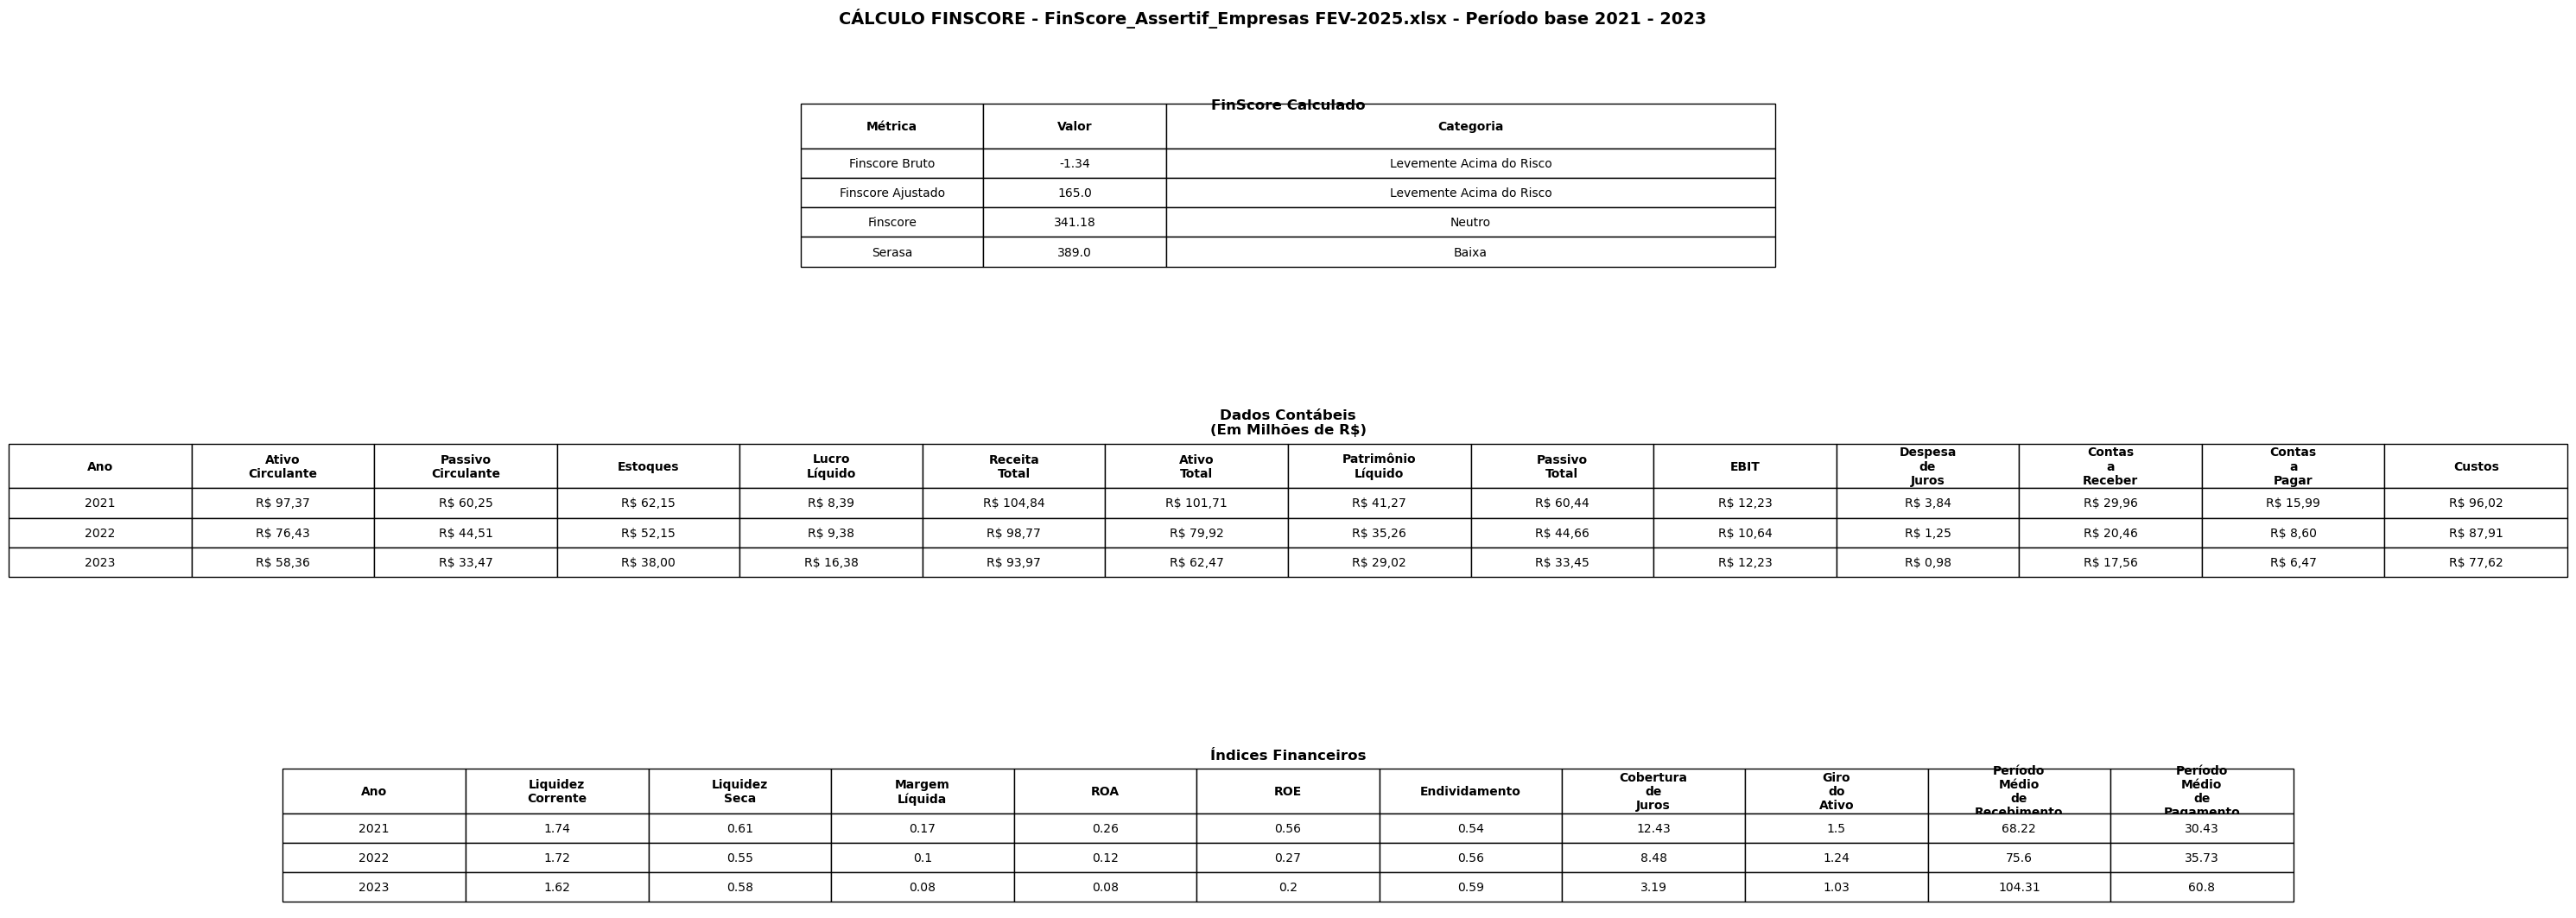

In [36]:

# --- Ajuste principal: inverter a ordem do df_indices se necessário ---
df_indices = df_indices.iloc[::-1].reset_index(drop=True)

## FORMATAR PADRÃO BR
# Cópia do df original
df_dados_contabeis_milhoes = df_dados_contabeis.copy()

# Excluindo a coluna 'Ano' antes de realizar as transformações
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.drop(columns=['Ano'])

# Dividindo os valores das colunas numéricas por 1.000.000
for col in df_dados_contabeis_milhoes.select_dtypes(include=['float64', 'int64']).columns:
    df_dados_contabeis_milhoes[col] = df_dados_contabeis_milhoes[col] / 1_000_000

# Formatando os valores para o padrão brasileiro (R$ 1.000.000,00)
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.map(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    if isinstance(x, (int, float)) else x
)

## INSERIR A COLUNA 'ANO' NAS TABELAS 'Dados Contábeis' e 'Índices Financeiros'
anos = list(map(str, range(ano_inicial, ano_final + 1)))  # Criando lista correta de anos

# Ajustando tamanho das listas de anos conforme o número de linhas nos DataFrames
df_dados_contabeis_milhoes.insert(0, 'Ano', anos[:len(df_dados_contabeis_milhoes)])
df_indices.insert(0, 'Ano', anos[:len(df_indices)])

## DF RESULTADOS PRINCIPAIS
resultados_df = pd.DataFrame({
    'Métrica': ['Finscore Bruto', 'Finscore Ajustado', 'Finscore', 'Serasa'],
    'Valor': [finscore_bruto, escores_ajustados, finscore, serasa],
    'Categoria': [
        categorias_finscore_bruto([finscore_bruto])[0],
        categorias_finscore_ajustado([escores_ajustados])[0],
        categorias_finscore([finscore])[0],
        categorias_serasa([serasa])[0]
    ]
})

## INSERINDO QUEBRA DE LINHA NOS CABEÇALHOS
df_dados_contabeis_milhoes.columns = [col.replace(' ', '\n') for col in df_dados_contabeis_milhoes.columns]
df_indices.columns = [col.replace(' ', '\n') for col in df_indices.columns]
resultados_df.columns = [col.replace(' ', '\n') for col in resultados_df.columns]

## CABEÇALHO
fig, axs = plt.subplots(nrows=3, figsize=(14, 12))

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(hspace=1.2)  # Aumentando a separação entre as tabelas

fig.suptitle(
    f'CÁLCULO FINSCORE - {cliente} - Período base {ano_inicial} - {ano_final}',
    fontsize=14, fontweight='bold'
)

## TABELAS
def add_table(ax, df, title, top_padding=0.5):
    ax.axis('tight')
    ax.axis('off')

    # Ajuste dinâmico da largura das colunas
    num_cols = len(df.columns)
    col_widths = [0.15] * num_cols  # Largura padrão
    if 'Categoria' in df.columns:
        col_widths[-1] = 0.5  # Maior largura para 'Categoria'

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center', loc='center',
        colWidths=col_widths
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.3, 1.3)  # Ajustando escala para melhor legibilidade
    
    # Aumentando a altura da linha do cabeçalho
    for col in range(len(df.columns)):
        table[(0, col)].set_height(0.3)
    
    # Destacando o cabeçalho com negrito
    for key, cell in table._cells.items():
        if key[0] == 0:  # Se for a primeira linha (cabeçalho)
            cell.set_fontsize(10)
            cell.set_text_props(weight='bold')
        else:
            cell.set_text_props(ha='center', va='center', wrap=True)  # Ajuste para quebras de linha
            cell.set_height(0.2)  # Aumentando altura para melhor ajuste de texto

    # Ajustar a posição do título para ficar mais centralizado
    ax.set_title(title, fontsize=12, fontweight='bold', pad=top_padding)
    ax.title.set_y(1.1)  # Levando o título um pouco para cima

# Adicionando cada tabela com ajuste fino do título
add_table(axs[0], resultados_df, 'FinScore Calculado', top_padding=1.0)
add_table(axs[1], df_dados_contabeis_milhoes, 'Dados Contábeis\n(Em Milhões de R$)', top_padding=1.5)
add_table(axs[2], df_indices, 'Índices Financeiros', top_padding=1.5)

plt.show()


#### 5. Prompt IA

In [37]:
print('\n========================== INÍCIO ==========================')

print('- Gere um relatório detalhado de análise de crédito para o cliente abaixo, considerando sua situação financeira com base nos dados contábeis, índices financeiros e classificação final do FinScore.')

# **Informações do Cliente**
print('\n1️⃣ CLIENTE ANALISADO:')
print('--------------------------------------')
print(f'Nome: {cliente}')
print(f'Período da Análise: {ano_inicial} - {ano_final}')

# **Descrição Conceitual**
print('\n2️⃣ CONTEXTUALIZAÇÃO:')
print('--------------------------------------')
print('O relatório deve iniciar explicando o conceito do **FinScore**, um índice consolidado que sintetiza a **capacidade de pagamento, liquidez e resultados operacionais** da empresa.')
print('O FinScore é calculado a partir de demonstrações financeiras, índices contábeis e análise multivariada para fornecer uma **visão clara do risco financeiro** da empresa.')
print('O objetivo final é avaliar a **solidez financeira** da empresa e sua **capacidade de honrar compromissos financeiros**.')

# **Escalas de Classificação**
print('\n3️⃣ ESCALAS DE CLASSIFICAÇÃO DO FINSCORE:')
print('--------------------------------------')

# **Finscore Bruto**
print('\n📌 **Finscore Bruto:**')
print('Mede a posição relativa da empresa no conjunto analisado, refletindo sua liquidez e estrutura financeira.')
print('🔍 **Tabela de Classificação:**')
print('-------------------------------------------------------')
print('|   Intervalo do Escore   |      Categoria            |')
print('-------------------------------------------------------')
print('|  escore > 1.5           | Muito Abaixo do Risco     |')
print('|  1.0 < escore ≤ 1.5     | Levemente Abaixo do Risco |')
print('| -1.0 ≤ escore ≤ 1.0     | Neutro                    |')
print('| -1.5 < escore < -1.0    | Levemente Acima do Risco  |')
print('|  escore ≤ -1.5          | Muito Acima do Risco      |')
print('-------------------------------------------------------')

# **Finscore Ajustado**
print('\n📌 **Finscore Ajustado:**')
print('Versão ajustada do FinScore Bruto, considerando o contexto setorial e ajustando distorções estatísticas.')
print('🔍 **Tabela de Classificação:**')
print('-------------------------------------------------------')
print('|   Intervalo do Escore  |      Categoria            |')
print('-------------------------------------------------------')
print('|  escore > 750          | Muito Abaixo do Risco     |')
print('|  500 < escore ≤ 750    | Levemente Abaixo do Risco |')
print('| 250 ≤ escore ≤ 500     | Neutro                    |')
print('| 100 < escore < 250     | Levemente Acima do Risco  |')
print('|  escore ≤ 100          | Muito Acima do Risco      |')
print('-------------------------------------------------------')

# **Finscore Final**
print('\n📌 **Finscore Final:**')
print('Indicador consolidado, refletindo a **saúde financeira geral** da empresa.')
print('🔍 **Tabela de Classificação:**')
print('-------------------------------------------------------')
print('|   Intervalo do Escore  |      Categoria            |')
print('-------------------------------------------------------')
print('|  escore > 750          | Muito Abaixo do Risco     |')
print('|  500 < escore ≤ 750    | Levemente Abaixo do Risco |')
print('| 250 ≤ escore ≤ 500     | Neutro                    |')
print('| 100 < escore < 250     | Levemente Acima do Risco  |')
print('|  escore ≤ 100          | Muito Acima do Risco      |')
print('-------------------------------------------------------')

# **Serasa Score**
print('\n📌 **Serasa Score:**')
print('O Serasa Score é um indicador utilizado para avaliar o risco de inadimplência com base no histórico financeiro do cliente.')
print('O Serasa pode ser comparado ao **FinScore** para validar a análise de risco.')
print('🔍 **Tabela de Classificação:**')
print('---------------------------------')
print('|   Intervalo do Escore  | Categoria  |')
print('---------------------------------')
print('|  701 a 1.000          | Excelente  |')
print('|  501 a 700            | Bom        |')
print('|  301 a 500            | Baixa      |')
print('|  0 a 300              | Muito Baixa|')
print('---------------------------------')

# **Dados Contábeis**
print('\n4️⃣ DADOS CONTÁBEIS:')
print('--------------------------------------')
print('Os seguintes dados foram extraídos das demonstrações financeiras da empresa. Para cada um, explique seu significado e impacto na análise de crédito.')
print(df_dados_contabeis)

# **Índices Contábeis**
print('\n5️⃣ ÍNDICES FINANCEIROS:')
print('--------------------------------------')
print('Os índices abaixo avaliam **liquidez, rentabilidade e estrutura de capital** da empresa. Explique o significado de cada um e como afetam a análise de crédito.')
print(df_indices)

# **Análise da Situação da Empresa**
print('\n6️⃣ INTERPRETAÇÃO DOS RESULTADOS:')
print('--------------------------------------')
print('Analise os índices e explique:')
print('- A **capacidade de pagamento da empresa** com base nos índices de liquidez.')
print('- A **rentabilidade**, considerando os indicadores de margem líquida, ROA e ROE.')
print('- O nível de **endividamento** e sua relação com o capital próprio.')
print('- Se há sinais de **desequilíbrio financeiro** ou indicadores de solvência positiva.')

# **Resultado do PCA**
print('\n7️⃣ RESULTADOS DA ANÁLISE MULTIVARIADA (PCA):')
print('--------------------------------------')
print('Os cálculos do PCA foram utilizados para consolidar os índices financeiros e gerar uma **avaliação agregada do risco**.')
print('Evite termos técnicos e foque na interpretação dos componentes principais.')

# **Classificação Final**
print('\n8️⃣ CLASSIFICAÇÃO FINAL:')
print('--------------------------------------')
print('O **FinScore Final** reflete a posição da empresa no espectro de risco.')
print('\n🚨 **Finscore Final:**', resultados_df.iloc[0, 1])
print('🛑 **Categoria:**', resultados_df.iloc[0, 2])
print('\n📌 **Serasa Score:**', resultados_df.iloc[3, 1])
print('🔍 **Categoria Serasa:**', resultados_df.iloc[3, 2])

# **Comparação FinScore x Serasa**
print('\n📊 **Comparação entre FinScore e Serasa:**')
print('Analise se há coerência entre os dois scores. Caso o FinScore indique um risco alto e o Serasa indique um score positivo, justifique a divergência.')
print('Considere fatores como:')
print('- Volume de endividamento recente.')
print('- Histórico de crédito da empresa.')
print('- Setor de atuação e sazonalidade.')

# **Conclusão**
print('\n9️⃣ CONCLUSÃO:')
print('--------------------------------------')
print('Finalizando, apresente uma conclusão sobre a empresa:')
print('- **Se o cliente representa um risco ou uma oportunidade de crédito.**')
print('- **Se a empresa está financeiramente saudável ou requer monitoramento.**')
print('- **Recomendações de mitigação de riscos (ex: garantias, limites de crédito, acompanhamento periódico).**')

print('\n========================== FIM ==========================')



========================== INÍCIO ==========================
- Gere um relatório detalhado de análise de crédito para o cliente abaixo, considerando sua situação financeira com base nos dados contábeis, índices financeiros e classificação final do FinScore.

1️⃣ CLIENTE ANALISADO:
--------------------------------------
Nome: FinScore_Assertif_Empresas FEV-2025.xlsx
Período da Análise: 2021 - 2023

2️⃣ CONTEXTUALIZAÇÃO:
--------------------------------------
O relatório deve iniciar explicando o conceito do **FinScore**, um índice consolidado que sintetiza a **capacidade de pagamento, liquidez e resultados operacionais** da empresa.
O FinScore é calculado a partir de demonstrações financeiras, índices contábeis e análise multivariada para fornecer uma **visão clara do risco financeiro** da empresa.
O objetivo final é avaliar a **solidez financeira** da empresa e sua **capacidade de honrar compromissos financeiros**.

3️⃣ ESCALAS DE CLASSIFICAÇÃO DO FINSCORE:
---------------------------

In [38]:
## Baseado na v5
# Equalizar versões scikit-learn local e google colab
# prompt IA